**Gravitational Lensing By a Point Mass**

Here we will plot the images created by a point mass.

A point mass will always create two images of the source behind it although the inner image is very demagified when the source image is far away from the center.  One image appears within the Einstein radius and the other outside of it.

Einstein radius, $\theta_{\rm E}$. is given by

$\theta_{\rm E} = \sqrt{ \frac{4 G M}{c^2} \frac{D_{ls}}{D_s D_l} }$

If the angular position of the source relative to the center of the lens is $\beta$ and the position of the image is $\theta$ then the solutions for the images positions are

$\theta = \frac{1}{2}\left( \beta \pm \sqrt{\beta^2 + 4 \theta^2_{\rm E}} \right)  $

Because of circular symmetry, the centre source point, the centre of the lens and both image points must by on the same line.

In [4]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [5]:

## function that takes source position returns image position for image 1
def image1(y1,y2):
    # magnitude of source position
    m = np.sqrt(y1*y1 + y2*y2)
    x1 = y1 * 0.5 * (m+np.sqrt(m*m+4)) /m
    x2 = y2 * 0.5 * (m+np.sqrt(m*m+4)) /m
    return x1,x2

## function that takes source position returns image position for image 2
def image2(y1,y2):
    # magnitude of source position
    m = np.sqrt(y1*y1 + y2*y2)
    x1 = y1 * 0.5 * (m-np.sqrt(m*m+4)) /m
    x2 = y2 * 0.5 * (m-np.sqrt(m*m+4)) /m
    return x1,x2

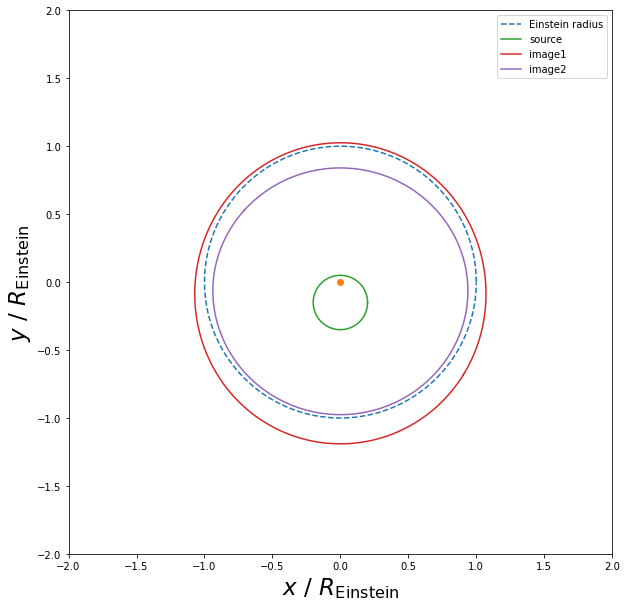

In [13]:
theta=np.arange(0,1,0.0005)*2*np.pi # angles in radians for a full circle

# setup plot
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect(1)

# draw Einstein radius
ax.plot(np.cos(theta),np.sin(theta),linestyle='--',label='Einstein radius')
ax.plot(0.0,0.0,'o')


#source position in Einstein radii
yo = -np.array([0.0,0.15])
#source radius in Einstein radii
r = 0.2

# outline of source
y1 = np.array(r*np.cos(theta)+yo[0])
y2 = np.array(r*np.sin(theta)+yo[1])

ax.plot(y1,y2,label='source')

x1,x2 = image1(y1,y2)
ax.plot(x1,x2,label='image1')

x1,x2 = image2(y1,y2)
ax.plot(x1,x2,label='image2')

plt.xlabel(r'$x ~/~ R_{\rm Einstein}$',fontsize=23)
plt.ylabel(r'$y ~/~ R_{\rm Einstein}$',fontsize=23)

plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend()
plt.show()


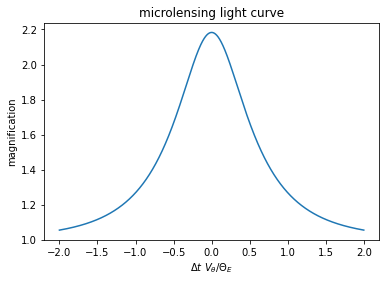

In [59]:
y_impact = 0.5

yo1 = np.arange(-2,2,0.001)
yo2 = np.zeros(len(yo1))
yo2 = yo2 + y_impact

def point_source_magnification(y1,y2) :
    y = np.sqrt(y1**2 + y2**2)
    return (y*y+2)/(y*np.sqrt(y*y+4))

mu = point_source_magnification(yo1,yo2)

plt.plot(yo1,mu)
plt.ylabel('magnification')
plt.xlabel(r'$\Delta t ~ V_\theta / \Theta_E$')
plt.title('microlensing light curve')
plt.show()

In [60]:
def area_in_closed_curve(x,y) :
    area = 0.0
    x = x - np.mean(x)
    y = y - np.mean(y)
    for i in range(len(x)-1) :
        area += x[i]*y[i+1] - y[i]*x[i+1]
    area += x[-1]*y[0] - y[-1]*x[0]
    
    return abs(area)/2.

def finite_magnification(yc1,yc2,r) :
    
    theta=np.arange(0,1,0.001)*2*np.pi
    
    y1 = np.array(r*np.cos(theta)+yc1)
    y2 = np.array(r*np.sin(theta)+yc2)

    x1,x2 = image1(y1,y2)
    area1 = area_in_closed_curve(x1,x2)
    y1 = np.array(r*np.cos(theta)+yc1)
    y2 = np.array(r*np.sin(theta)+yc2)


    x1,x2 = image2(y1,y2)
    area2 = area_in_closed_curve(x1,x2)

    if(yc1*yc1 + yc2*yc2 <= r*r) :
        #plt.plot(x1,x2)
        #plt.plot(y1,y2)
        #plt.plot(0.0,0.0,'o')
        #plt.show()
        return (area1-area2)/(np.pi*r*r)
    
    return (area1 + area2)/(np.pi*r*r)

finite_magnificationV = np.vectorize(finite_magnification)

2.228421028689752


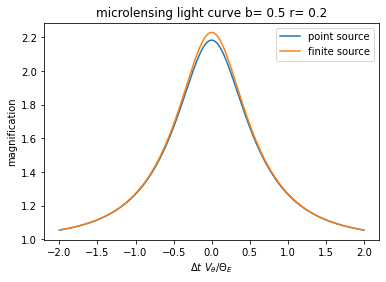

In [61]:

source_radius = 0.2

mu_finite = finite_magnificationV(yo1,yo2,source_radius)

print(finite_magnification(0,y_impact,source_radius))

plt.plot(yo1,mu,label='point source')
plt.plot(yo1,mu_finite,label='finite source')
plt.ylabel('magnification')
plt.xlabel(r'$\Delta t ~ V_\theta / \Theta_E$')
plt.title('microlensing light curve b= '+str(y_impact)+' r= '+str(source_radius))
plt.legend()

plt.show()
